In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.7.0'

In [4]:
tf.__version__

'2.7.0'

## Image Classifier
Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. The class labels are:

Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
image.png

Usage:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Returns: 2 tuples:

x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

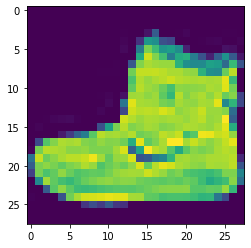

In [7]:
plt.imshow(X_train_full[0])

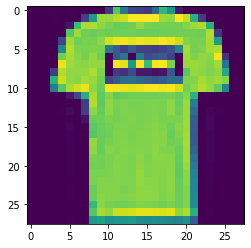

In [8]:
plt.imshow(X_train_full[1])

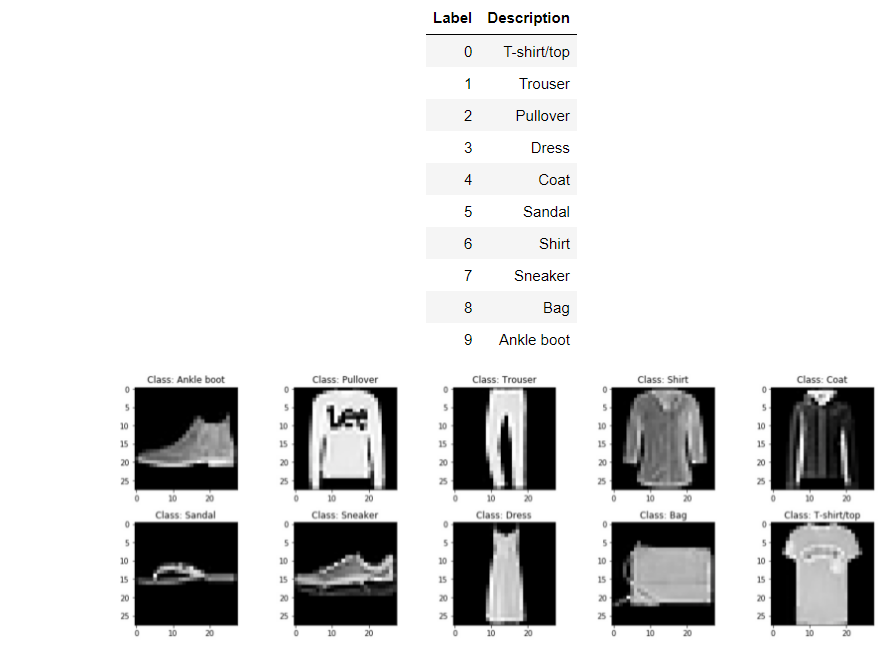

In [9]:
y_train_full[1]

0

0 refers to T-shirt/top

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train_full[9]]

'Sandal'

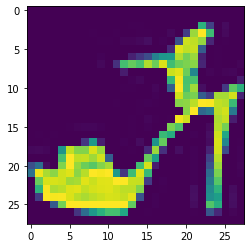

In [12]:
plt.imshow(X_train_full[9])

In [13]:
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

## Data normalization
We then normalize the data dimensions so that they are of approximately the same scale.

In [14]:
#We do it so that all the pixels from 0 to 255 are within 0 and 1.
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

## Split the data into train/validation/test datasets
In the earlier step of importing the date, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dateset is used in deep learning:

* __Training data__ — used for training the model
* __Validation data__ — used for tuning the hyperparameters and evaluate the models
* __Test data__ — used to test the model after the model has gone through initial vetting by the validation set.

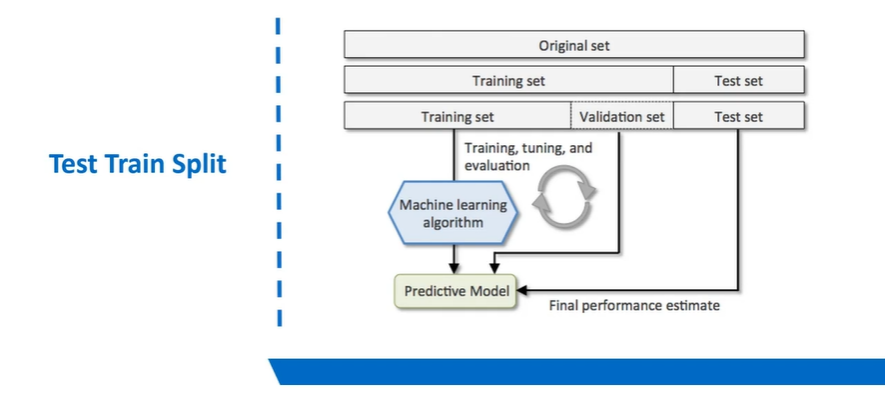

In [15]:
X_valid, X_train = X_train_n[:5000] , X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

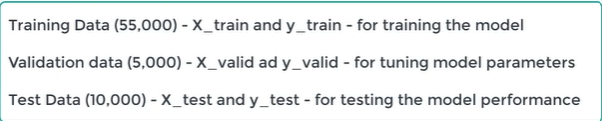

In [16]:
X_valid

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

__Preparation of data is done. Now it is time for model creation__

### Create the model architecture
There are two APIs for defining a model in Keras:
* Sequential model API - Straightforward and simple
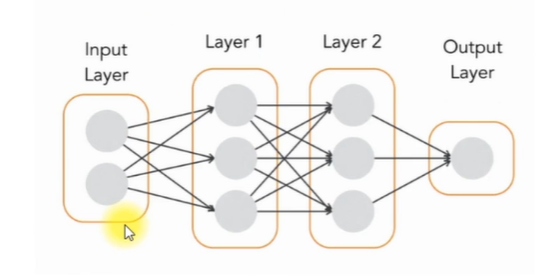
* Functional API - Complex


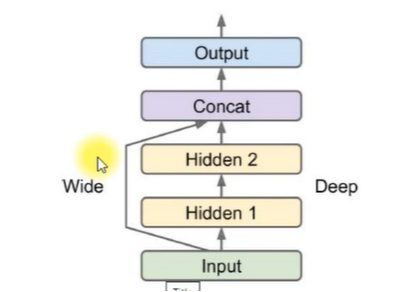

In [17]:
#random seed is used to get the same output everytime you run the code
np.random.seed(42)
tf.random.set_seed(42)

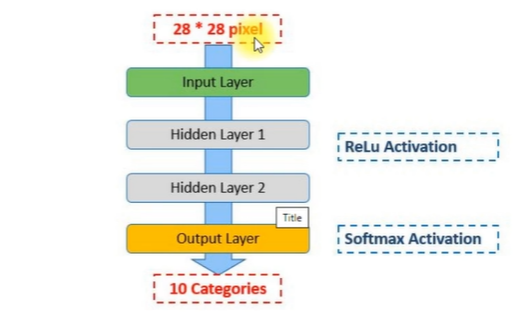

In [18]:
#Create an instance of keras model
model = keras.models.Sequential()

# Input layer.
# Flatten() -To convert the 2d array of 28X28 pixels to 784 pixels in single array
model.add(keras.layers.Flatten(input_shape=[28,28]))

# Hidden Layer 1
# Dense(300, activation="relu") specifies the number of neurons= 300 and activation function as ReLU 
model.add(keras.layers.Dense(300, activation="relu"))

# Hidden Layer 2 
model.add(keras.layers.Dense(100, activation="relu"))

# Output Layer
# Dense(10, activation="softmax") specifies the number of neurons= no of output variables=10 and activation function as Softmax
model.add(keras.layers.Dense(10, activation="softmax"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
import pydot
keras.utils.plot_model(model)

ModuleNotFoundError: No module named 'pydot'

__We can access the parameters using get_weight() method__

In [21]:
weights, biases = model.layers[1].get_weights()

In [22]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
biases.shape

(300,)

__Compiling and Training the Neural Network model__

In [26]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd", metrics=["accuracy"])
# loss function: *sparse_categorical_crossentropy* because y variable or the target variable is in form of labels

In [32]:
model_history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2206 - accuracy: 0.9205 - val_loss: 0.2893 - val_accuracy: 0.8954
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2174 - accuracy: 0.9219 - val_loss: 0.2931 - val_accuracy: 0.8960
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2139 - accuracy: 0.9224 - val_loss: 0.3759 - val_accuracy: 0.8636
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2105 - accuracy: 0.9245 - val_loss: 0.2893 - val_accuracy: 0.8980
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2086 - accuracy: 0.9247 - val_loss: 0.2807 - val_accuracy: 0.8996
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2027 - accuracy: 0.9272 - val_loss: 0.2985 - val_accuracy: 0.8924
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2004 - accuracy: 0.9298 - val_loss: 0.2925 - val_accuracy:

In [33]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [34]:
model_history.history

{'loss': [0.22057399153709412,
  0.21742527186870575,
  0.21394512057304382,
  0.21046674251556396,
  0.20857109129428864,
  0.20269471406936646,
  0.20038741827011108,
  0.19745704531669617,
  0.19390302896499634,
  0.19074498116970062,
  0.18875107169151306,
  0.18449513614177704,
  0.1816871166229248,
  0.17931018769741058,
  0.17609182000160217,
  0.1737304925918579,
  0.17108948528766632,
  0.16822245717048645,
  0.16555748879909515,
  0.1627948135137558,
  0.15973106026649475,
  0.1573452651500702,
  0.15492171049118042,
  0.1524989753961563,
  0.15010446310043335,
  0.1481582224369049,
  0.14564388990402222,
  0.14350447058677673,
  0.1408138871192932,
  0.13823480904102325],
 'accuracy': [0.9205090999603271,
  0.921854555606842,
  0.9224363565444946,
  0.9244545698165894,
  0.9246545433998108,
  0.9272181987762451,
  0.9297636151313782,
  0.9296727180480957,
  0.9307454824447632,
  0.932200014591217,
  0.9310363531112671,
  0.9340545535087585,
  0.9357818365097046,
  0.93638181

In [35]:
import pandas as pd

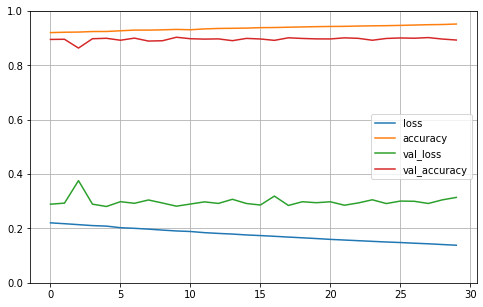

In [36]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

With increase in epoch-
1. The val_accuracy and accuracy is increasing
2. Loss and val_loss is decreasing

Also the model haven't converged yet as the validation parameters are still incrementing.

In [37]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3511 - accuracy: 0.8887


[0.35109081864356995, 0.888700008392334]

__How to identify images using the model__

In [39]:
# using three records from test set to put in model to predict what object it is.
X_new = X_test[:3]

In [40]:
# The model predicts the probability for every class labels for each record.
# the class labels which has highest probability is suppose to be the object.
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [43]:
# If we want to predict the class directly rather than these probabilities.
y_pred = np.argmax(model.predict(X_new),axis=1)
y_pred

array([9, 2, 1], dtype=int64)

In [44]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


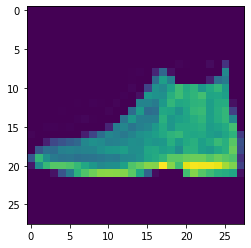

In [54]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


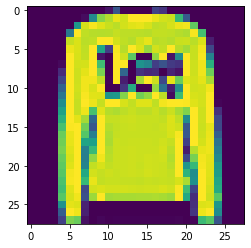

In [53]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


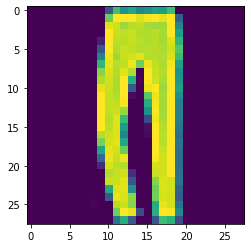

In [55]:
print(plt.imshow(X_test[2]))